<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data_multi_delta_(2)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,25.557020,80.623437,85.526906,89.142867,-64.451369,226.398861,301.785893,-75.387033
1,0.0,1.0,60.761480,60.181976,88.074620,31.024792,-5.781663,244.261206,285.648935,-41.387729
2,0.0,2.0,91.403676,46.838737,45.359481,20.551807,-21.665878,192.487824,235.462230,-42.974406
3,0.0,3.0,97.048544,78.992154,77.845178,78.965801,97.481446,440.333123,356.762342,83.570781
4,0.0,4.0,52.444794,73.771366,96.945260,59.134702,179.401727,471.697849,321.001929,150.695920
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,96.887270,41.485205,52.405362,48.587160,40.621664,289.986660,262.178739,27.807922
29996,999.0,26.0,55.251076,44.499517,89.472898,60.740413,0.244396,260.208300,292.069856,-31.861556
29997,999.0,27.0,57.668720,86.106535,95.603655,83.099461,76.259578,408.737949,395.698979,13.038970
29998,999.0,28.0,23.238307,88.725313,34.937659,50.994829,-169.750794,38.145315,170.403897,-132.258582


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    25.557020  80.623437  85.526906  89.142867  -64.451369   
      1.0    60.761480  60.181976  88.074620  31.024792   -5.781663   
      2.0    91.403676  46.838737  45.359481  20.551807  -21.665878   
      3.0    97.048544  78.992154  77.845178  78.965801   97.481446   
      4.0    52.444794  73.771366  96.945260  59.134702  179.401727   
...                ...        ...        ...        ...         ...   
999.0 25.0   96.887270  41.485205  52.405362  48.587160   40.621664   
      26.0   55.251076  44.499517  89.472898  60.740413    0.244396   
      27.0   57.668720  86.106535  95.603655  83.099461   76.259578   
      28.0   23.238307  88.725313  34.937659  50.994829 -169.750794   
      29.0   98.527049  46.330907  88.606761  68.724568   -2.761293   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    226.398861  301.785893  -75.387033  
      1.0    244.261206  285.648935  -41.387729  
      2.0    192.487824  235.462230  -42.974406  
      3.0    440.333123  356.762342   83.570781  
      4.0    471.697849  321.001929  150.695920  
...                 ...         ...         ...  
999.0 25.0   289.986660  262.178739   27.807922  
      26.0   260.208300  292.069856  -31.861556  
      27.0   408.737949  395.698979   13.038970  
      28.0    38.145315  170.403897 -132.258582  
      29.0   309.427992  375.141563  -65.713571  

[30000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    25.557020  80.623437  85.526906  89.142867  -64.451369   
      1.0    60.761480  60.181976  88.074620  31.024792   -5.781663   
      2.0    91.403676  46.838737  45.359481  20.551807  -21.665878   
      3.0    97.048544  78.992154  77.845178  78.965801   97.481446   
      4.0    52.444794  73.771366  96.945260  59.134702  179.401727   
...                ...        ...        ...        ...         ...   
999.0 25.0   96.887270  41.485205  52.405362  48.587160   40.621664   
      26.0   55.251076  44.499517  89.472898  60.740413    0.244396   
      27.0   57.668720  86.106535  95.603655  83.099461   76.259578   
      28.0   23.238307  88.725313  34.937659  50.994829 -169.750794   
      29.0   98.527049  46.330907  88.606761  68.724568   -2.761293   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    226.398861  301.785893  -75.387033  
      1.0    244.261206  285.648935  -41.387729  
      2.0    192.487824  235.462230  -42.974406  
      3.0    440.333123  356.762342   83.570781  
      4.0    471.697849  321.001929  150.695920  
...                 ...         ...         ...  
999.0 25.0   289.986660  262.178739   27.807922  
      26.0   260.208300  292.069856  -31.861556  
      27.0   408.737949  395.698979   13.038970  
      28.0    38.145315  170.403897 -132.258582  
      29.0   309.427992  375.141563  -65.713571  

[30000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,25.557020,80.623437,85.526906,89.142867,-64.451369,226.398861,301.785893,-75.387033
1,0.0,1.0,60.761480,60.181976,88.074620,31.024792,-5.781663,244.261206,285.648935,-41.387729
2,0.0,2.0,91.403676,46.838737,45.359481,20.551807,-21.665878,192.487824,235.462230,-42.974406
3,0.0,3.0,97.048544,78.992154,77.845178,78.965801,97.481446,440.333123,356.762342,83.570781
4,0.0,4.0,52.444794,73.771366,96.945260,59.134702,179.401727,471.697849,321.001929,150.695920
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,96.887270,41.485205,52.405362,48.587160,40.621664,289.986660,262.178739,27.807922
29996,999.0,26.0,55.251076,44.499517,89.472898,60.740413,0.244396,260.208300,292.069856,-31.861556
29997,999.0,27.0,57.668720,86.106535,95.603655,83.099461,76.259578,408.737949,395.698979,13.038970
29998,999.0,28.0,23.238307,88.725313,34.937659,50.994829,-169.750794,38.145315,170.403897,-132.258582


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    25.557020  80.623437  85.526906  89.142867  -64.451369   
      1.0    60.761480  60.181976  88.074620  31.024792   -5.781663   
      2.0    91.403676  46.838737  45.359481  20.551807  -21.665878   
      3.0    97.048544  78.992154  77.845178  78.965801   97.481446   
      4.0    52.444794  73.771366  96.945260  59.134702  179.401727   
...                ...        ...        ...        ...         ...   
999.0 25.0   96.887270  41.485205  52.405362  48.587160   40.621664   
      26.0   55.251076  44.499517  89.472898  60.740413    0.244396   
      27.0   57.668720  86.106535  95.603655  83.099461   76.259578   
      28.0   23.238307  88.725313  34.937659  50.994829 -169.750794   
      29.0   98.527049  46.330907  88.606761  68.724568   -2.761293   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    226.398861  301.785893  -75.387033  
      1.0    244.261206  285.648935  -41.387729  
      2.0    192.487824  235.462230  -42.974406  
      3.0    440.333123  356.762342   83.570781  
      4.0    471.697849  321.001929  150.695920  
...                 ...         ...         ...  
999.0 25.0   289.986660  262.178739   27.807922  
      26.0   260.208300  292.069856  -31.861556  
      27.0   408.737949  395.698979   13.038970  
      28.0    38.145315  170.403897 -132.258582  
      29.0   309.427992  375.141563  -65.713571  

[30000 rows x 8 columns]

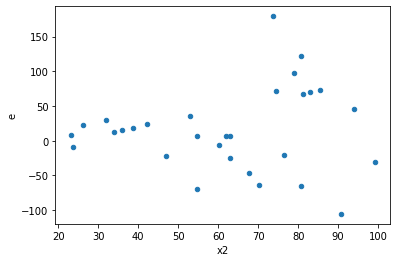

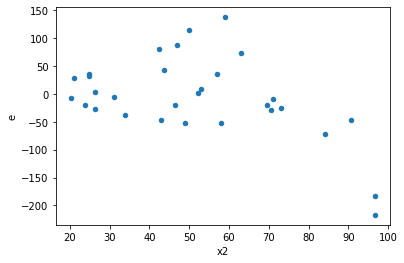

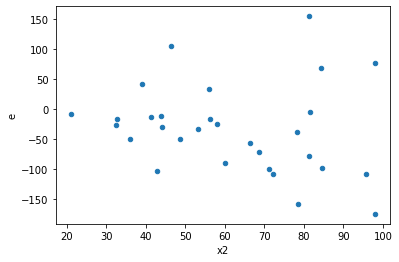

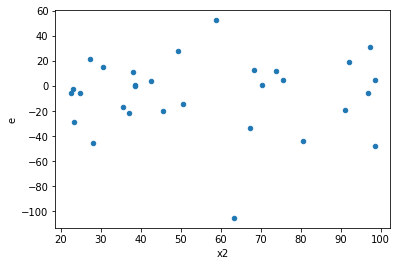

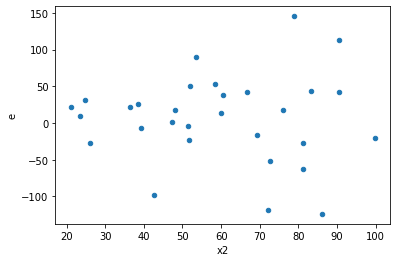

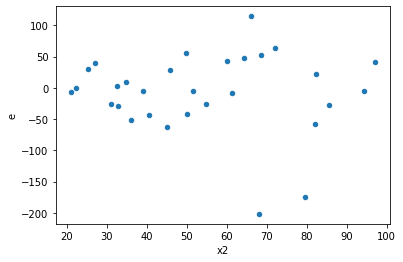

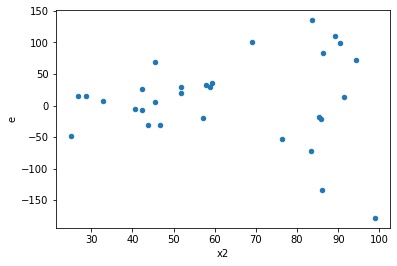

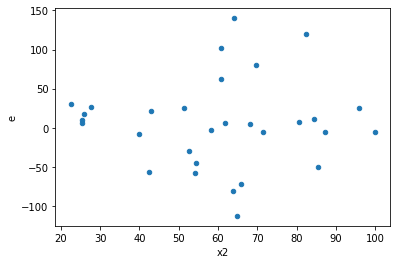

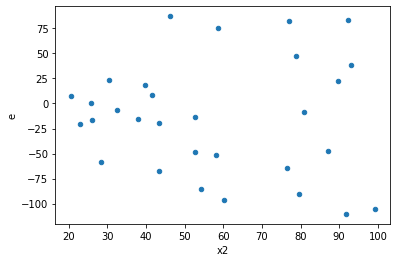

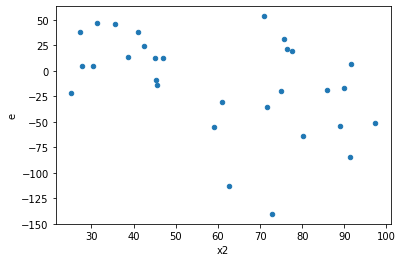

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[['x1', 'x2', 'x3', 'x4']]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,7.0,15.0,22225.346867473396,57749.6458859551,3175.0495524961993,3849.9763923970067,1.2125720650155476,0.7089076137699923,0.6455461931150038,0.35445380688499617,Reject001=1 : Homoscedasticity
2.0,9.0,13.0,11826.442310571598,59716.63465308072,1314.0491456190664,4593.587281006209,3.495749984938431,0.04088887521171425,0.9795555623941429,0.020444437605857124,Reject001=1 : Homoscedasticity
6.0,13.0,9.0,9795.822587687182,102852.12240369919,753.5248144374756,11428.01360041102,15.166074668612351,0.0002994153617195128,0.9998502923191402,0.0001497076808597564,Reject001=0 : Heteroscedasticity
11.0,12.0,10.0,20510.182434047183,56659.437363104415,1709.181869503932,5665.943736310442,3.3150034161987154,0.06676168209211975,0.9666191589539401,0.03338084104605987,Reject001=1 : Homoscedasticity
13.0,12.0,10.0,12721.527528778222,61979.015724667064,1060.1272940648519,6197.901572466706,5.846374871362908,0.008832284396447898,0.995583857801776,0.004416142198223949,Reject001=0 : Heteroscedasticity
14.0,8.0,14.0,22068.125539541386,75892.44438935816,2758.5156924426733,5420.8888849541545,1.9651470172185037,0.25695772238075953,0.8715211388096202,0.12847886119037977,Reject001=1 : Homoscedasticity
15.0,11.0,11.0,15298.534650189758,34849.80389100918,1390.775877289978,3168.1639900917435,2.277983132886319,0.18787104235224295,0.9060644788238785,0.09393552117612147,Reject001=1 : Homoscedasticity
16.0,12.0,10.0,5943.64491951956,38432.21522828334,495.3037432932967,3843.221522828334,7.759322587135285,0.002843605564707641,0.9985781972176462,0.0014218027823538204,Reject001=0 : Heteroscedasticity
17.0,10.0,12.0,13490.652237793043,49520.54790891668,1349.0652237793042,4126.712325743057,3.0589420385341963,0.07047262777402485,0.9647636861129876,0.03523631388701243,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,14.0,8.0,67173.20855596391,15245.391093458999,4798.086325425994,1905.6738866823748,0.39717373916009757,0.12522297764036505,Reject001=1 : Homoscedasticity
1.0,7.0,15.0,22225.346867473396,57749.6458859551,3175.0495524961993,3849.9763923970067,1.2125720650155476,0.7089076137699923,Reject001=1 : Homoscedasticity
2.0,9.0,13.0,11826.442310571598,59716.63465308072,1314.0491456190664,4593.587281006209,3.495749984938431,0.04088887521171425,Reject001=1 : Homoscedasticity
3.0,10.0,12.0,21298.878473147346,2903.6236135422832,2129.8878473147347,241.96863446185694,0.11360627967661299,0.0016805500256994652,Reject001=0 : Heteroscedasticity
4.0,14.0,8.0,61916.402420214006,19878.254301194043,4422.600172872429,2484.7817876492554,0.5618373107500283,0.33004102320416795,Reject001=1 : Homoscedasticity
5.0,8.0,14.0,28748.637669914475,16860.389714722834,3593.5797087393094,1204.313551051631,0.3351292161748446,0.1244717416199073,Reject001=1 : Homoscedasticity
6.0,13.0,9.0,9795.822587687182,102852.12240369919,753.5248144374756,11428.01360041102,15.166074668612351,0.0002994153617195128,Reject001=0 : Heteroscedasticity
7.0,11.0,11.0,45187.815763762344,13558.95251082132,4107.983251251122,1232.6320464383018,0.3000577098416584,0.05767228470755533,Reject001=1 : Homoscedasticity
8.0,8.0,14.0,26988.823933412332,28653.478887984525,3373.6029916765415,2046.677063427466,0.6066739531821295,0.48345491330799734,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      866
Reject001=0 : Heteroscedasticity    134
Name: Result_test, dtype: int64